In [ ]:
# скачиваем файл
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q' -O math_students.csv

--2021-09-27 14:24:50--  https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q
Resolving docs.google.com (docs.google.com)... 64.233.189.101, 64.233.189.139, 64.233.189.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b2m05uk3r78qsn2qfop18eijo2bdfs58/1632752625000/07828702499945486090/*/1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q?e=download [following]
--2021-09-27 14:24:51--  https://doc-0g-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b2m05uk3r78qsn2qfop18eijo2bdfs58/1632752625000/07828702499945486090/*/1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q?e=download
Resolving doc-0g-5k-docs.googleusercontent.com (doc-0g-5k-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0g-5k-docs.googleusercontent.com (doc-0g-5k-d

In [ ]:
import pandas as pd
data = pd.read_csv('math_students.csv', delimiter=',')

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

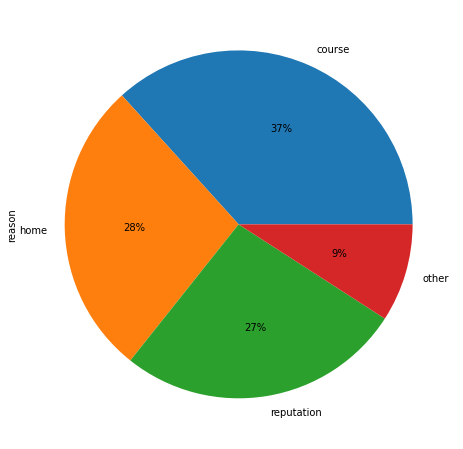

In [ ]:
data.reason.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

2. Найдите количество студентов, у родителей которых нет никакого образования.

In [ ]:
print("Количество студентов, у которых оба родителя без образования: " + str(len(data.where(data["Medu"] == 0).where(data["Fedu"] == 0).dropna())))
print("Количество студентов, у которых мать без образования: " + str(len(data.where(data["Medu"] == 0).dropna())))
print("Количество студентов, у которых отец без образования: " + str(len(data.where(data["Fedu"] == 0).dropna())))

Количество студентов, у которых оба родителя без образования: 0
Количество студентов, у которых мать без образования: 3
Количество студентов, у которых отец без образования: 2


3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [ ]:
data.where(data["school"] == "MS").dropna().age.min()

17.0

4. Найдите количество студентов, имеющих нечетное число пропусков.

In [ ]:
print("Количество студентов, у которых нечетное число пропусков: " + str(len(data.where(data["absences"]  % 2 != 0).dropna())))

Количество студентов, у которых нечетное число пропусков: 41


5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [ ]:
romantic_G3_mean = data.where(data["romantic"] == "yes").dropna().G3.mean()
non_romantic_G3_mean = data.where(data["romantic"] == "no").dropna().G3.mean()
difference = romantic_G3_mean - non_romantic_G3_mean
print("Разность = " + str(round(difference, 2)))

Разность = -1.26


6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*



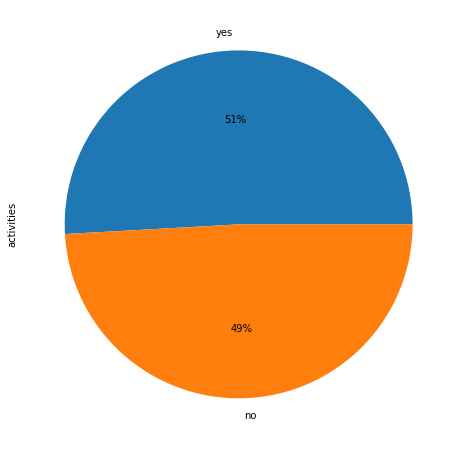

In [ ]:
data.activities.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

In [ ]:
activity_key = data.activities.value_counts().keys()[0]  # Возвращает наиболее частое значение атрибута "activities"
activity_series = data.where(data["activities"] == activity_key).dropna().absences.value_counts()
activity_series

0.0     51
2.0     37
4.0     29
6.0     17
8.0     16
10.0     9
14.0     7
3.0      4
16.0     4
12.0     3
7.0      3
15.0     3
20.0     2
18.0     2
1.0      2
9.0      2
11.0     2
17.0     1
54.0     1
25.0     1
56.0     1
13.0     1
22.0     1
30.0     1
5.0      1
Name: absences, dtype: int64

In [ ]:
print("Число пропусков, наиболее часто встречающееся у студентов: " + str(activity_series.keys()[0]))

Число пропусков, наиболее часто встречающееся у студентов: 0.0
